In [129]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math

In [184]:


class Fressnel:
    def __init__(self):
        self.theta = np.linspace(0,90,500)
        self.theta_i = np.radians(self.theta)

        
    def set_n_i(self,n_i):
        self.n_i = n_i
        
    def set_n_t(self,n_t):
        self.n_t = n_t
        
    def get_n_i(self):
        return self.n_i
    
    def get_n_t(self):
        return self.n_t
    '''        
    def transmittance(self):
        self.theta_t = []
        max_index = 0
        for i in range(len(self.theta_i)):
            transmittance_sin = (self.n_i/self.n_t)*cmath.sin(self.theta_i[i])
            if cmath.isclose(transmittance_sin.real, 1.0) or cmath.isclose(transmittance_sin.real, -1.0):
                transmittance = cmath.pi/2.0 * math.copysign(1, transmittance_sin.real)
            else:
                transmittance = cmath.asin(transmittance_sin)
            self.theta_t.append(transmittance)
            self.max_index = i
            if transmittance.imag != 0:
                break
        #print(max_index)
        return self.theta_t, self.max_index, transmittance_sin        
    '''
    def transmittance(self):
        self.theta_t = []
        max_index = 0
        for i in range(len(self.theta_i)):
            transmittance_sin = (self.n_i/self.n_t)*cmath.sin(self.theta_i[i])
            if cmath.isclose(transmittance_sin.real, 1.0) or cmath.isclose(transmittance_sin.real, -1.0):
                transmittance = cmath.pi/2.0 * cmath.copysign(1, transmittance_sin.real)
            else:
                transmittance = cmath.asin(transmittance_sin)
            self.theta_t.append(transmittance)
            self.max_index = i
            if transmittance.imag != 0:
                break
        return self.theta_t, self.max_index, transmittance_sin

    def r_perp(self):
        self.r_perp_arr = []
        self.t_perp_arr = []
        theta_t = self.transmittance()[0]
        for i in range(self.max_index):
            r_perp_num = self.n_i*np.cos(self.theta_i[i])-n_t*np.cos(self.theta_t[i])
            r_perp_den = self.n_i*np.cos(self.theta_i[i])+n_i*np.cos(self.theta_t[i])
            r_perp = r_perp_num/r_perp_den
            t_perp = 1-r_perp
            self.r_perp_arr.append(r_perp)
            self.t_perp_arr.append(t_perp)
        return self.r_perp_arr, self.max_index, self.t_perp_arr

    def r_parallel(self):
        self.r_parallel_arr = []
        self.t_parallel_arr = []
        theta_t = self.transmittance()[0]
        self.max_index = self.transmittance()[1]
        for i in range(self.max_index):
            r_parallel_numer = self.n_t*np.cos(self.theta_i[i])-n_i*np.cos(self.theta_t[i])
            r_parallel_den = self.n_t*np.cos(self.theta_i[i])+n_i*np.cos(self.theta_t[i])
            r_parallel = r_parallel_numer/r_parallel_den
            t_parallel = 1-r_parallel
            self.r_parallel_arr.append(r_parallel)
            self.t_parallel_arr.append(t_parallel)
        return self.r_parallel_arr, self.max_index, self.t_parallel_arr

    def index_finder(self, brewster):
        n_i_arr = np.linspace(1,2,100)
        
        for i in range(len(n_i_arr)):
            n2 = n_i_arr[i]
            theta = np.arctan(n2/self.n_t)
            theta_deg = np.degrees(theta)
            if round(theta_deg,0) == brewster:
                n_i = n2
        return n_i

    
    def plot_transmittance(self):
        r_te = self.r_perp()
        r_tm = self.r_parallel()

        index_e = r_te[1]
        index_m = r_tm[1]
        if index_e < len(self.theta_i)-2:
            text = 'The angle becomes imaginary around ' + str((math.degrees(self.theta_i[index_e]))) + ' degrees'
        else:
            text = ''
        plt.plot(self.theta_i[0:index_e],r_te[2],color='m',label = '$t_{TE}$')
        plt.plot(self.theta_i[0:index_m],r_tm[2],color='y',label = '$t_{TM}$')
        plt.text(0,0.2,text)
        plt.title('$t_{TE}$ and $t_{TM}$ as a function of $\\theta_{i}$')
        plt.xlabel('Angle [rad]')
        plt.ylabel('Transmittance')
        plt.legend()
        return plt.show()
    
    def plot_reflectance(self):
        r_te = self.r_perp()
        r_tm = self.r_parallel()

        index_e = r_te[1]
        index_m = r_tm[1]
        if index_e < len(self.theta_i)-2:
            text = 'The angle becomes imaginary around ' + str((math.degrees(self.theta_i[index_e]))) + ' degrees'
        else:
            text = ''
        plt.plot(self.theta_i[0:index_e],r_te[0],color='m',label = '$r_{TE}$')
        plt.plot(self.theta_i[0:index_m],r_tm[0],color='y',label = '$r_{TM}$')
        plt.text(0,0.2,text)
        plt.title('$r_{TE}$ and $r_{TM}$ as a function of $\\theta_{i}$')
        plt.xlabel('Angle [rad]')
        plt.ylabel('Reflectance')
        plt.legend()
        return plt.show()

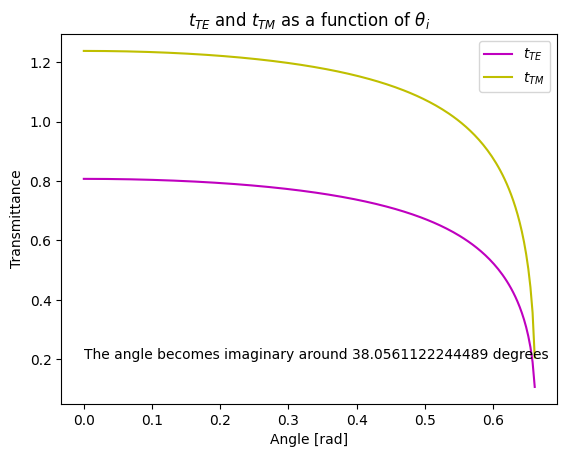

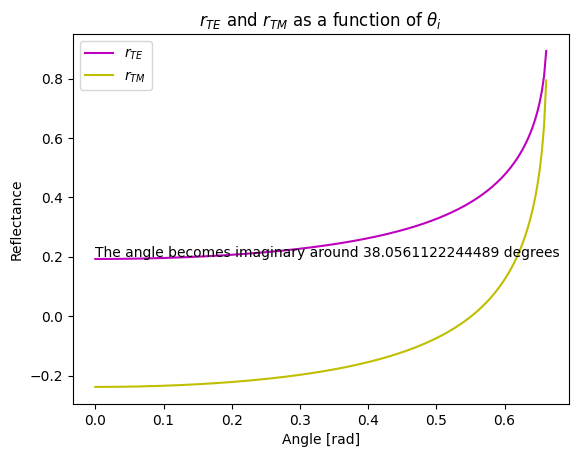

1.6262626262626263


In [185]:
thick_to_thin = Fressnel()
brewster = 58
n_t = 1
thick_to_thin.set_n_t(n_t)
n_i = thick_to_thin.index_finder(brewster)
thick_to_thin.set_n_i(n_i)
thick_to_thin.transmittance()
thick_to_thin.r_perp()
thick_to_thin.r_parallel()
thick_to_thin.plot_transmittance()
thick_to_thin.plot_reflectance()

print(n_i)


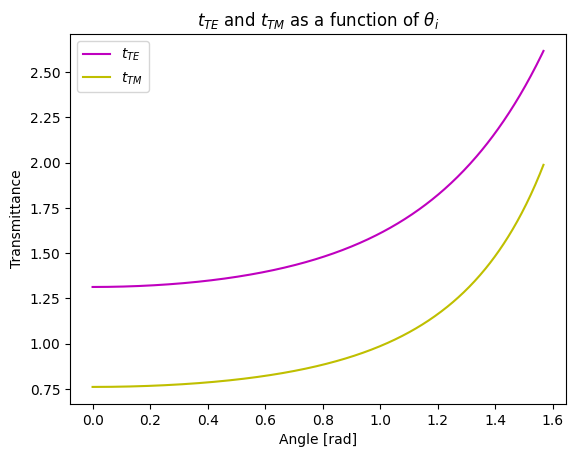

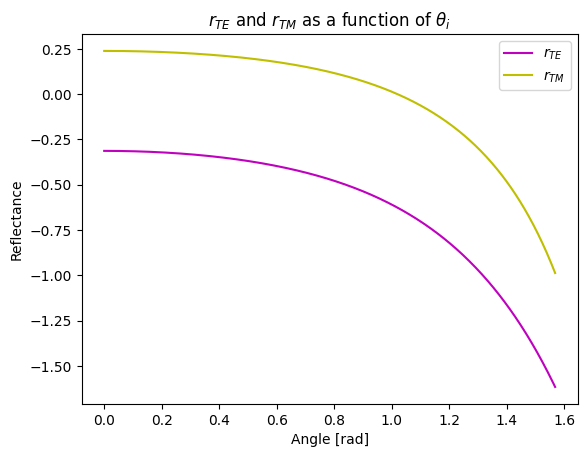

In [186]:
thin_to_thick = Fressnel()
brewster = 58
n_i = 1
n_t = thick_to_thin.index_finder(brewster)
thin_to_thick.set_n_t(n_t)

thin_to_thick.set_n_i(n_i)
thin_to_thick.transmittance()
thin_to_thick.r_perp()
thin_to_thick.r_parallel()
thin_to_thick.plot_transmittance()
thin_to_thick.plot_reflectance()